In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Kazem Kamrani/Desktop/Time Series Analysis/international-airline-passengers.csv',
                 index_col = 'Month',
                 parse_dates = True)

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


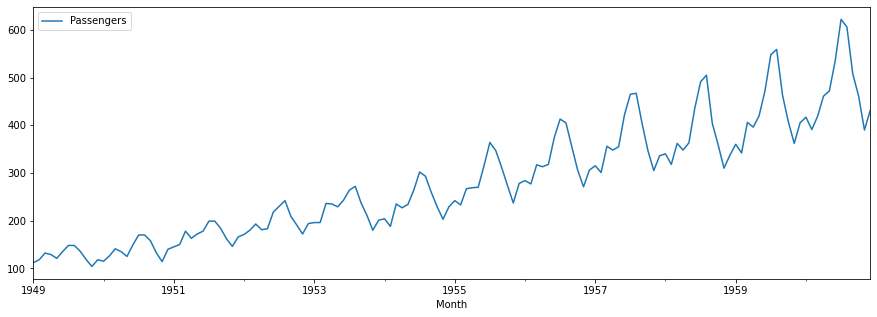

In [4]:
df.plot(figsize = (15,5));

In [5]:
df['1stdiff'] = df['Passengers'].diff();

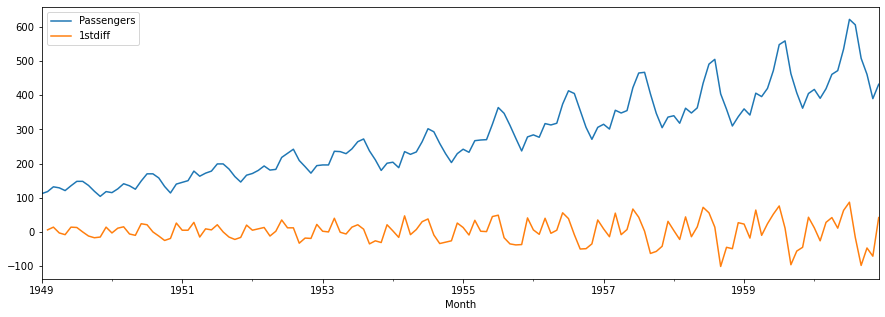

In [6]:
df.plot(figsize = (15,5));

In [7]:
df['LogPassengers'] = np.log(df['Passengers'])

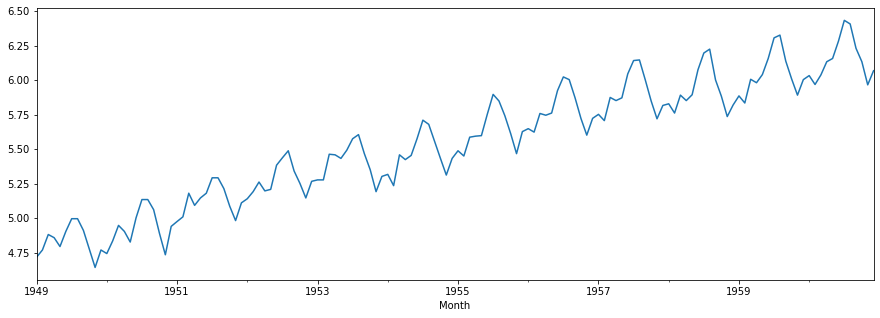

In [8]:
df['LogPassengers'].plot(figsize = (15,5));

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
df.index.freq = 'MS'

Ntest = 12 
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [11]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [12]:
armia = ARIMA(train['Passengers'], order=(1,0,0))

In [13]:
arima_result = armia.fit()

In [14]:
df.loc[train_idx,'AR(1)'] = arima_result.predict(
    strat = train.index[0], end=train.index[-1])

<AxesSubplot:xlabel='Month'>

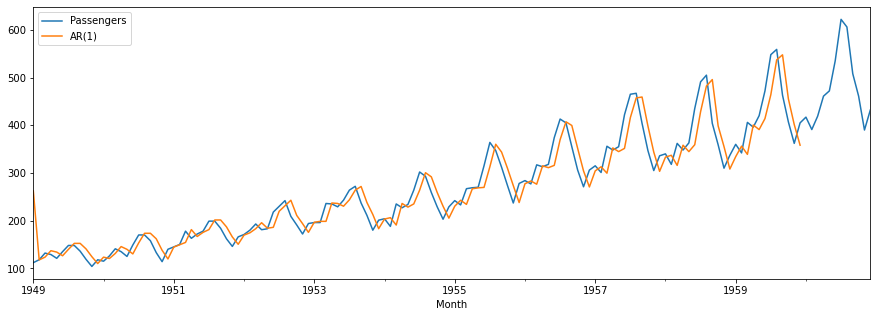

In [15]:
df[['Passengers', 'AR(1)' ]].plot(figsize=(15,5))

In [16]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

<AxesSubplot:xlabel='Month'>

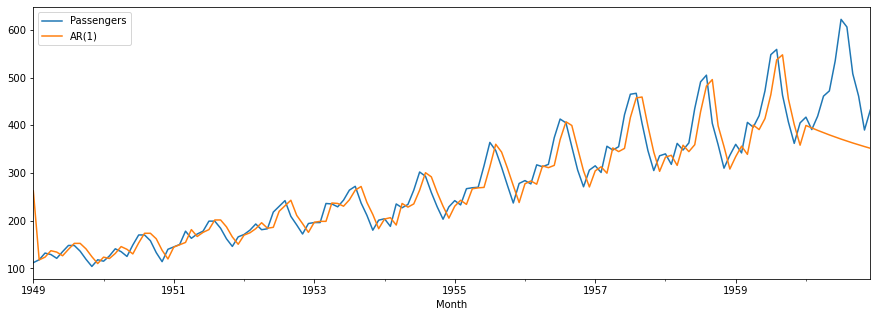

In [17]:
df[['Passengers','AR(1)']].plot(figsize=(15,5))

In [18]:
# Explore prediction result further 
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [19]:
# Confidence interval 
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829380
1960-04-01,269.338255,499.534230
1960-05-01,253.432283,506.121348
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201639
1960-08-01,215.354569,518.324977
1960-09-01,204.941149,520.764225
1960-10-01,195.386336,522.649550


In [20]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df['Passengers'], label='data')
    
    #plot the curve fitted on train set 
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')
    
    # forecast the test set 
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
    forecast = prediction_result.predicted_mean 
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, \
                    lower, upper, \
                    color='red', alpha=0.3)
    ax.legend()

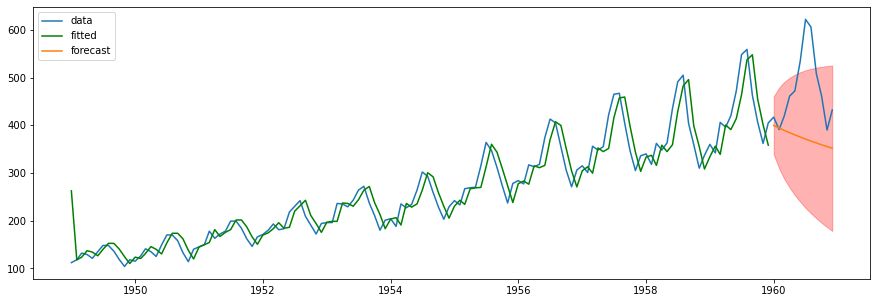

In [21]:
plot_fit_and_forecast(arima_result)

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


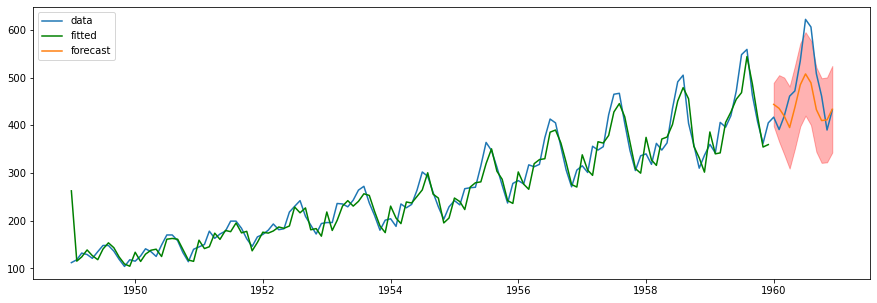

In [22]:
arima = ARIMA(train['Passengers'], order=(10,0,0)) #AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


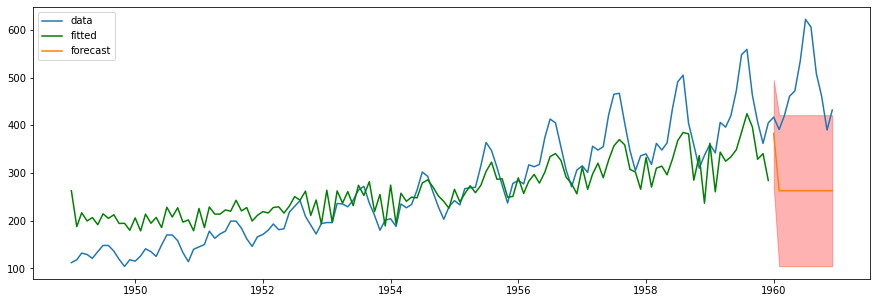

In [23]:
arima = ARIMA(train['Passengers'], order=(0,0,1)) #MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


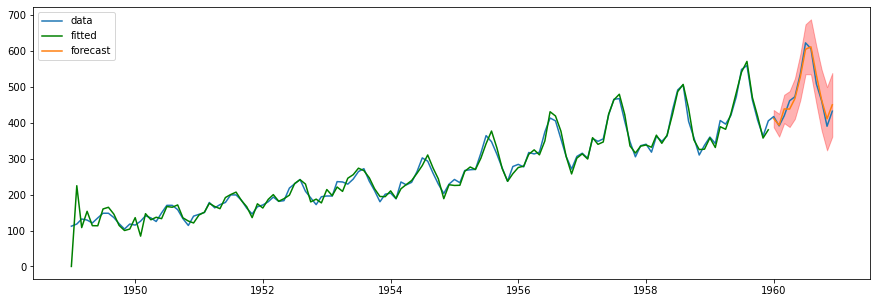

In [24]:
arima = ARIMA(train['Passengers'], order=(12,3,12)) 
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [25]:
df['Log1stDiff'] = df['LogPassengers'].diff()

<AxesSubplot:xlabel='Month'>

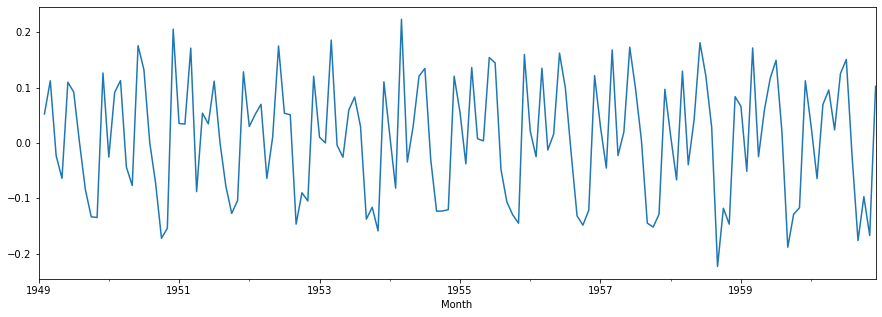

In [26]:
df['Log1stDiff'].plot(figsize=(15,5))

In [27]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

In [28]:


def plot_fit_and_forecast_int(result, d, col='Passengers'):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df[col], label='data')
    
    # plot the curve fitted on train set
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    
    ax.plot(train.index[d:], train_pred, color='green', label='fitted')
    
    # forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f'lower {col}'],conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, \
                    lower, upper, \
                    color='red', alpha=0.3)
    ax.legend()

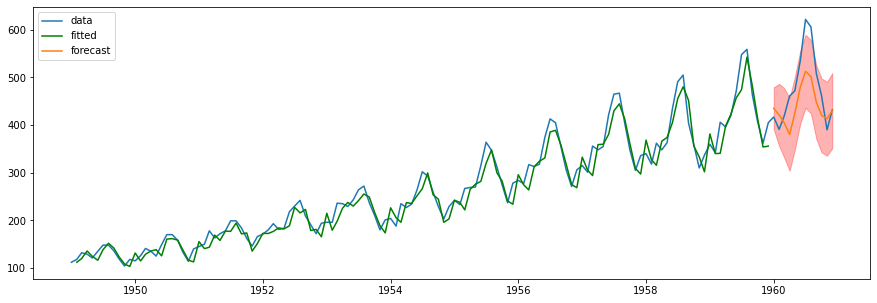

In [29]:
plot_fit_and_forecast_int(arima_result_811,1)

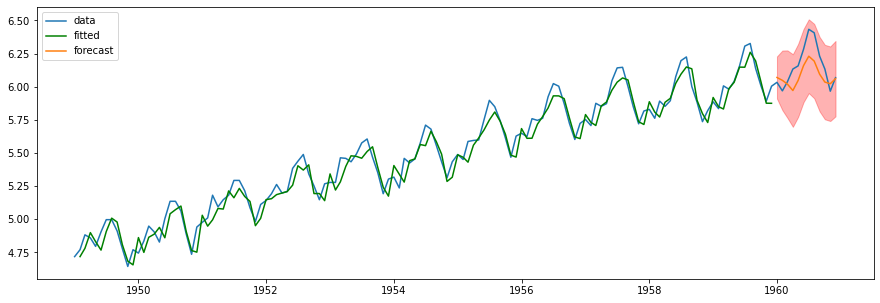

In [30]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811,1, col = 'LogPassengers')

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


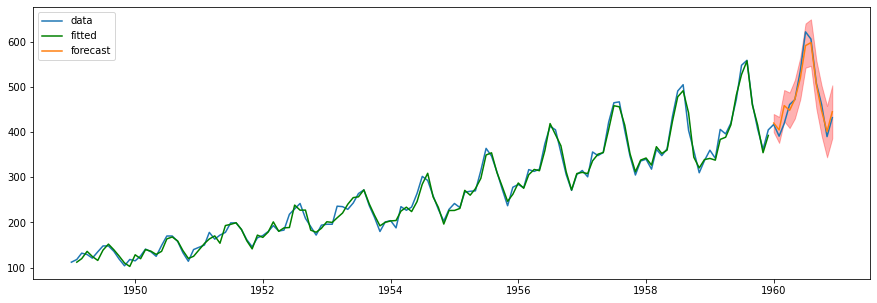

In [31]:
arima = ARIMA(train['Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210,1, col = 'Passengers')

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


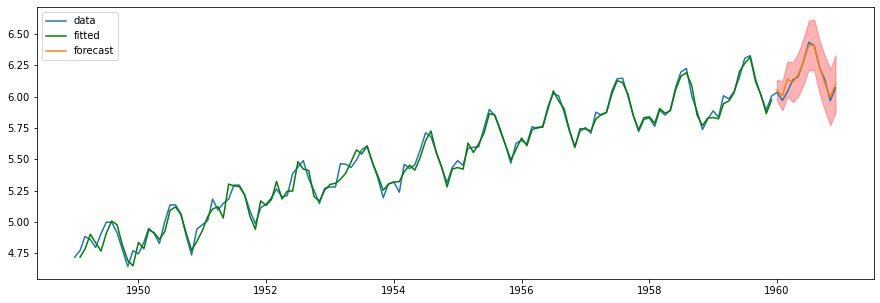

In [32]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210,1, col = 'LogPassengers')

In [33]:
def rmse(result, is_logged):
    forecast = result.forecast(Ntest)
    if is_logged:
        forecast =np.exp(forecast)
        
    t = test['Passengers']
    y = forecast 
    return np.sqrt(np.mean((t-y)**2))

In [34]:
print("ARIMA(8,1,1):", rmse(arima_result_811,False))
print("ARIMA(8,1,1)logged:", rmse(arima_result_log811,True))
print("ARIMA(12,1,1):", rmse(arima_result_1210,False))
print("ARIMA(12,1,1)logged:", rmse(arima_result_log1210,True))

ARIMA(8,1,1): 59.06458961942983
ARIMA(8,1,1)logged: 61.608422666952954
ARIMA(12,1,1): 17.483957723474276
ARIMA(12,1,1)logged: 16.106633880169625
